#Amazon Sales Data Analysis
This analysis delves into Amazon's sales data, providing insights through data preprocessing, exploratory data analysis (EDA), and visualizations. The goal is to understand sales performance across regions, item types, and customer behavior. We will present the findings in a structured and professional manner, drawing conclusions and suggesting additional analyses where necessary.

#1. Introduction
The dataset contains detailed sales information, including order dates, shipping dates, total revenue, total profit, item types, and regions. This analysis aims to uncover trends, correlations, and key metrics that can inform business decisions

#2. Data Loading and Preprocessing
Firstly,import the necessary libraries and load the dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('Amazon Sales data.csv')
df = data.copy()


Let's set the 'Order ID' as the index and convert date columns to datetime objects for easier manipulation.

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Shipping Time'] = (df['Ship Date'] - df['Order Date']).dt.days
df.drop_duplicates(inplace=True)

#3. Exploratory Data Analysis (EDA)
Let's perform basic EDA to understand the structure and summary statistics of the dataset.

In [ ]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Shipping Time
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,30
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,24
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,6
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,15
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,5


In [ ]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit',
       'Shipping Time'],
      dtype='object')

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          100 non-null    object        
 1   Country         100 non-null    object        
 2   Item Type       100 non-null    object        
 3   Sales Channel   100 non-null    object        
 4   Order Priority  100 non-null    object        
 5   Order Date      100 non-null    datetime64[ns]
 6   Order ID        100 non-null    int64         
 7   Ship Date       100 non-null    datetime64[ns]
 8   Units Sold      100 non-null    int64         
 9   Unit Price      100 non-null    float64       
 10  Unit Cost       100 non-null    float64       
 11  Total Revenue   100 non-null    float64       
 12  Total Cost      100 non-null    float64       
 13  Total Profit    100 non-null    float64       
 14  Shipping Time   100 non-null    int64         
dtypes: date

,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Shipping Time
count,100,1.000000e+02,100,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,100.000000
mean,2013-09-16 14:09:36,5.550204e+08,2013-10-09 22:48:00,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05,23.360000
min,2010-02-02 00:00:00,1.146066e+08,2010-02-25 00:00:00,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03,0.000000
25%,2012-02-14 12:00:00,3.389225e+08,2012-02-24 18:00:00,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05,9.750000
50%,2013-07-12 12:00:00,5.577086e+08,2013-08-11 12:00:00,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05,23.500000
75%,2015-04-07 00:00:00,7.907551e+08,2015-04-28 00:00:00,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05,36.250000
max,2017-05-22 00:00:00,9.940222e+08,2017-06-17 00:00:00,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06,50.000000
std,NaN,2.606153e+08,NaN,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05,14.742586


Conclusion: The dataset contains no missing values and is well-structured, with key columns such as 'Order Date', 'Ship Date', 'Total Revenue', and 'Total Profit' properly formatted and ready for detailed analysis.

#4. Correlation and Statistics
Let's explore the correlation between total revenue and total profit, and compute key statistics for total profit.

In [ ]:
np.corrcoef(df['Total Revenue'], df['Total Profit'])
print(np.average(df['Total Profit']))
print(np.max(df['Total Profit']))
print(np.min(df['Total Profit']))
print(np.var(df['Total Profit']))

441681.98399999994
1719922.04
1258.02
190392340968.9648


Conclusion: The strong positive correlation between total revenue and total profit indicates that as revenue increases, profit also tends to increase. Key statistics like average, maximum, and minimum profit provide a summary of profitability across the dataset.

#5. Sales Analysis by Region and Item Type

*5.1. Total Revenue by Region*

Let's aggregate total revenue by region to identify top-performing regions.

In [ ]:
region_sales = df.groupby('Region')['Total Revenue'].sum().sort_values(ascending=False)
print("Sales by Region:\n", region_sales)


Sales by Region:
 Region
Sub-Saharan Africa                   39672031.43
Europe                               33368932.11
Asia                                 21347091.02
Australia and Oceania                14094265.13
Middle East and North Africa         14052706.58
Central America and the Caribbean     9170385.49
North America                         5643356.55
Name: Total Revenue, dtype: float64


Bar Plot: Total Revenue by Region

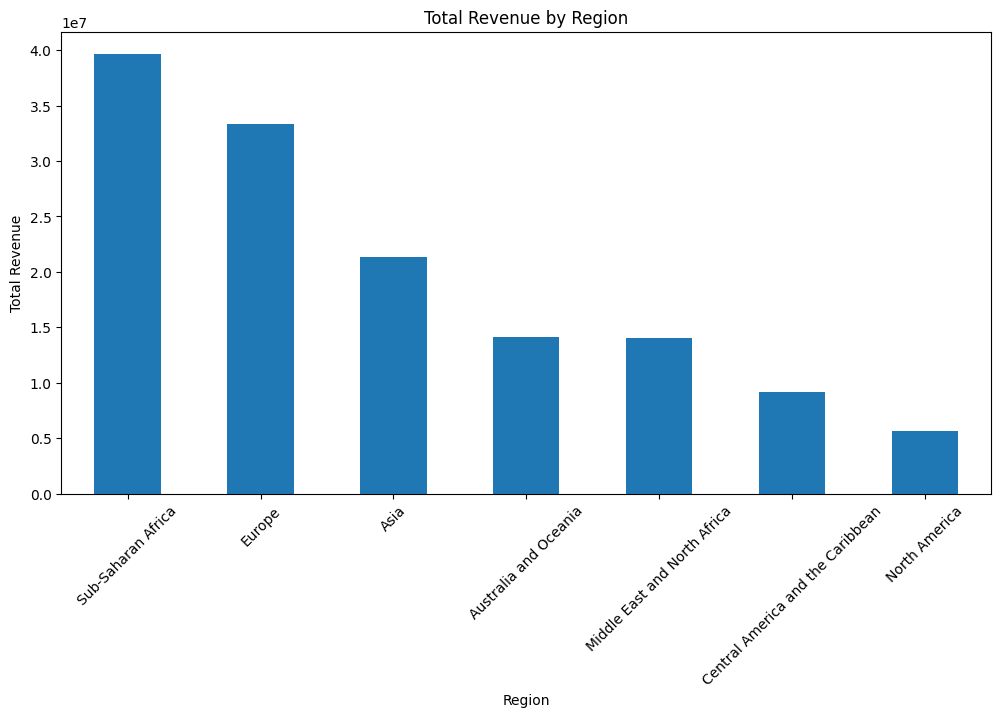

In [ ]:
plt.figure(figsize=(12, 6))
region_sales.plot(kind='bar')
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

Conclusion: This plot shows the regions like Sub-Saharan Africa,Europe,Asia generate the highest revenue, helping to target marketing and sales strategies effectively.

*5.2. Top 10 Countries by Sales*

Let's identify the top 10 countries by total revenue.

In [ ]:
top_countries = df.groupby('Country')['Total Revenue'].sum().sort_values(ascending=False).head(10)
print("Top 10 Countries by Sales:\n", top_countries)

Top 10 Countries by Sales:
 Country
Honduras        6336545.48
Myanmar         6161257.90
Djibouti        6052890.86
Turkmenistan    5822036.20
Mexico          5643356.55
The Gambia      5449517.95
Lithuania       5396577.27
Rwanda          5253769.42
Azerbaijan      4478800.21
Brunei          4368316.68
Name: Total Revenue, dtype: float64


Conclusion: Identifying the top 10 countries by sales helps prioritize market efforts in regions with the highest revenue generation.

*5.3. Sales Distribution by Item Type*

Let's aggregate total revenue by item type to identify the best-selling items.

In [ ]:
item_sales = df.groupby('Item Type')['Total Revenue'].sum().sort_values(ascending=False)
print("Sales by Item Type:\n", item_sales)

Sales by Item Type:
 Item Type
Cosmetics          36601509.60
Office Supplies    30585380.07
Household          29889712.29
Baby Food          10350327.60
Clothes             7787292.80
Cereal              5322898.90
Meat                4503675.75
Personal Care       3980904.84
Vegetables          3089057.06
Beverages           2690794.60
Snacks              2080733.46
Fruits               466481.34
Name: Total Revenue, dtype: float64


Pie Chart: Sales Distribution by Item Type

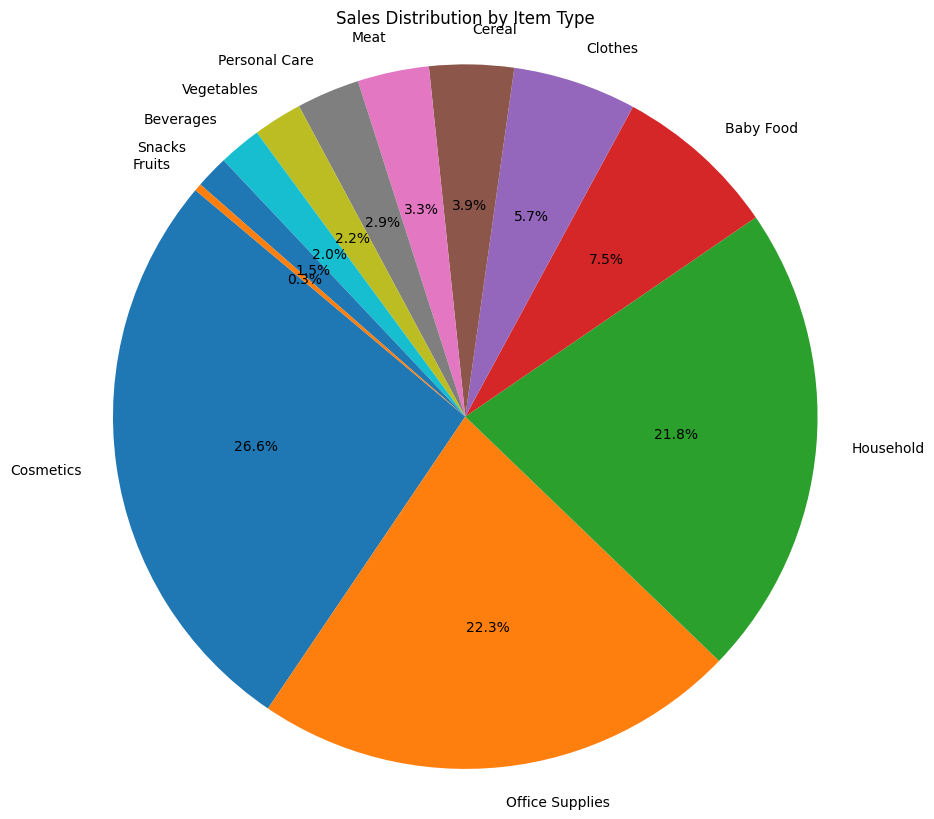

In [ ]:
plt.figure(figsize=(10, 10))
plt.pie(item_sales, labels=item_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Item Type')
plt.axis('equal')
plt.show()

Conclusion: The pie chart provides a visual representation of the proportion of total revenue contributed by each item type, highlighting the most profitable product categories like Cosmetics,Office Supplies,Household.

*5.4. Average Profit Margin by Item Type*

calculate the profit margin and find the average profit margin for each item type.



In [ ]:
df['Profit Margin'] = df['Total Profit'] / df['Total Revenue']
avg_margin = df.groupby('Item Type')['Profit Margin'].mean().sort_values(ascending=False)
print("Average Profit Margin by Item Type:\n", avg_margin)

Average Profit Margin by Item Type:
 Item Type
Clothes            0.672035
Cereal             0.430676
Vegetables         0.409775
Cosmetics          0.397690
Baby Food          0.375509
Snacks             0.361384
Beverages          0.330032
Personal Care      0.306619
Fruits             0.258307
Household          0.247999
Office Supplies    0.193870
Meat               0.135580
Name: Profit Margin, dtype: float64


Conclusion: Understanding profit margins by item type helps in pricing and inventory decisions, ensuring focus on high-margin products.

5.5 Scatter Plot:Relation between Units Sold and Unit cost

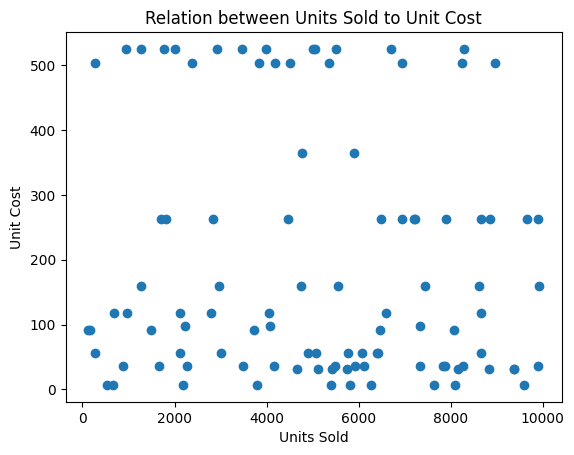

In [ ]:
plt.scatter(df['Units Sold'],df['Unit Cost'])
plt.title('Relation between Units Sold to Unit Cost')
plt.xlabel('Units Sold')
plt.ylabel('Unit Cost')
plt.show()

Conclusion:The above scatter plot suggest that there is an inverse propotionality between Units Sold and Unit Cost upto some extent.

#6. Sales Channel Efficiency

Let's analyze the efficiency of sales channels by looking at the average shipping time, profit margin, and order priority.

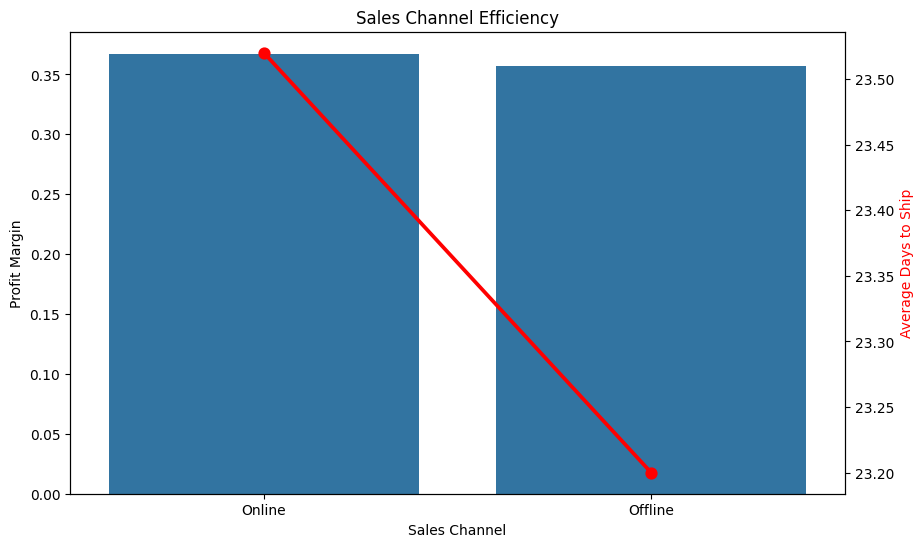

In [ ]:
df['Days to Ship'] = (pd.to_datetime(df['Ship Date']) - pd.to_datetime(df['Order Date'])).dt.days
channel_efficiency = df.groupby('Sales Channel').agg({
    'Days to Ship': 'mean',
    'Profit Margin': 'mean',
    'Order Priority': lambda x: (x == 'H').mean() * 100
}).sort_values('Profit Margin', ascending=False)

fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()
sns.barplot(x=channel_efficiency.index, y='Profit Margin', data=channel_efficiency, ax=ax1)
sns.pointplot(x=channel_efficiency.index, y='Days to Ship', data=channel_efficiency, color='r', ax=ax2)
ax1.set_ylabel('Profit Margin')
ax2.set_ylabel('Average Days to Ship', color='r')
plt.title('Sales Channel Efficiency')
plt.show()

Conclusion:Online sales have a slightly higher profit margin compared to offline sales. However, offline sales have a shorter average shipping time than online sales.

#7. Customer Purchase Behavior by Country

Let's analyze customer purchase behavior by country, focusing on order value, purchase frequency, and profit margin.

In [ ]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit',
       'Shipping Time', 'Profit Margin', 'Days to Ship'],
      dtype='object')

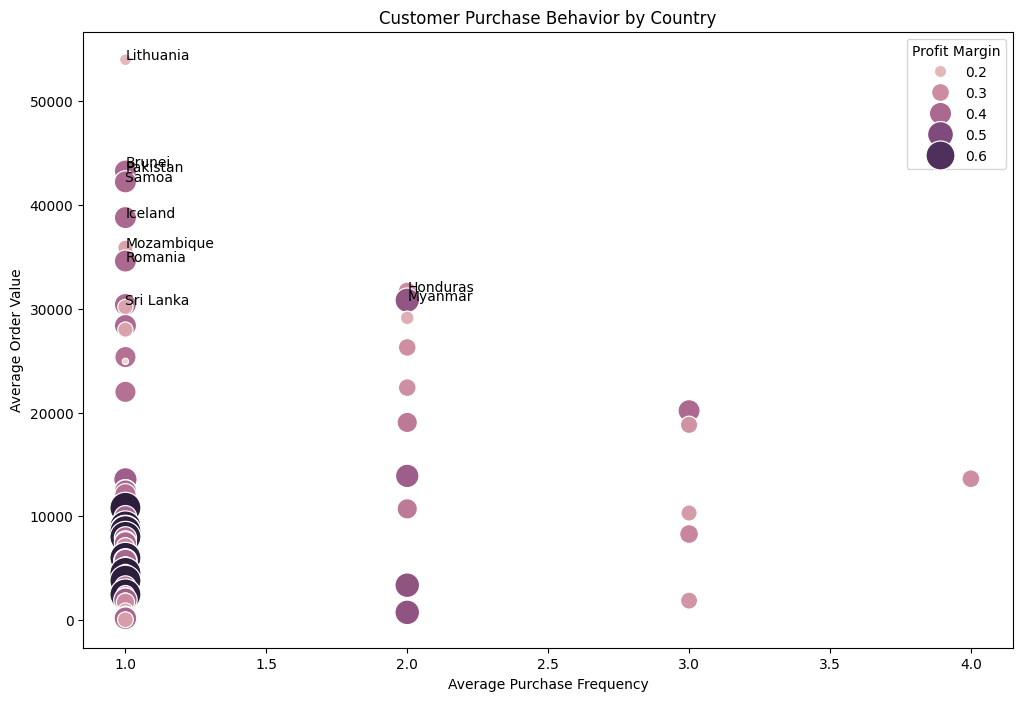

In [ ]:
df['Order Value'] = df['Total Revenue'] / df['Order ID'].nunique()
df['Purchase Frequency'] = df.groupby('Country')['Order ID'].transform('count')

behavior_analysis = df.groupby('Country').agg({
    'Order Value': 'mean',
    'Purchase Frequency': 'mean',
    'Profit Margin': 'mean'
}).sort_values('Order Value', ascending=False)

plt.figure(figsize=(12, 8))
sns.scatterplot(data=behavior_analysis, x='Purchase Frequency', y='Order Value',
                size='Profit Margin', sizes=(20, 500), hue='Profit Margin')
plt.title('Customer Purchase Behavior by Country')
plt.xlabel('Average Purchase Frequency')
plt.ylabel('Average Order Value')
for i, row in behavior_analysis.head(10).iterrows():
    plt.annotate(i, (row['Purchase Frequency'], row['Order Value']))
plt.show()


Conclusion: The scatter plot reveals customer behavior patterns, highlighting countries with high purchase frequency and order value, which can inform targeted marketing strategies.

#8. Distribution of Item Types

Let's visualize the distribution of item types to understand the popularity of different products.

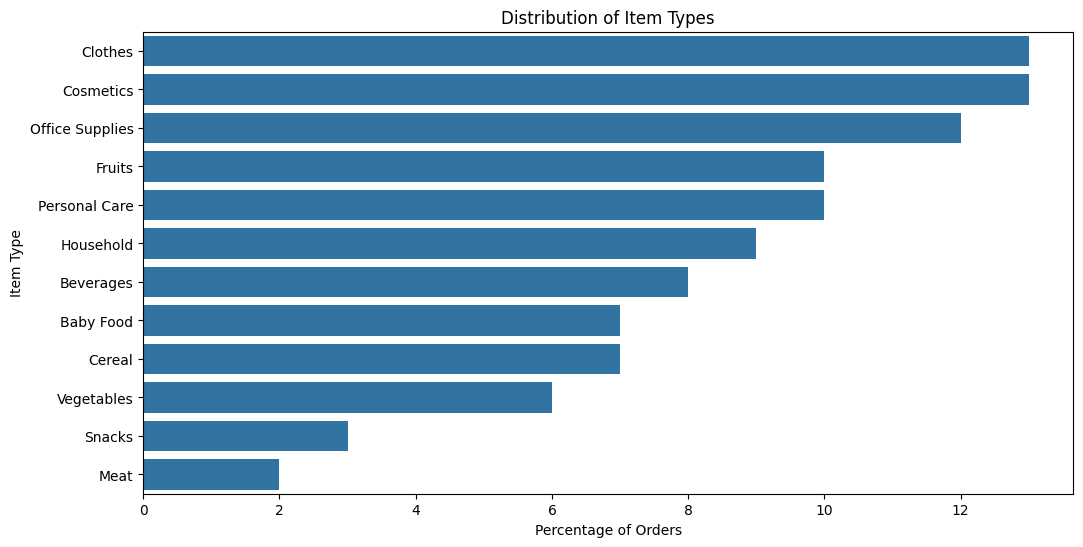

In [ ]:
item_counts = df['Item Type'].value_counts()
item_percentages = (item_counts / len(df)) * 100

plt.figure(figsize=(12, 6))
sns.barplot(x=item_percentages.values, y=item_percentages.index)
plt.title('Distribution of Item Types')
plt.xlabel('Percentage of Orders')
plt.ylabel('Item Type')
plt.show()

Conclusion: This bar plot shows the proportion of orders for each item type, helping to understand consumer preferences and adjust inventory accordingly

#9.Seasonal Trends
Analyzing sales data by month to identify seasonal trends.

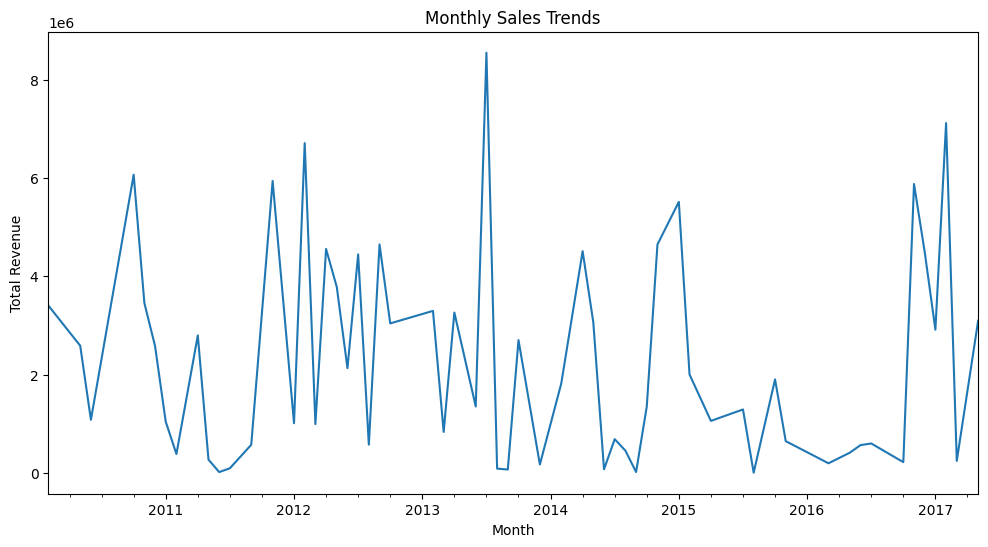

In [ ]:
df['Order Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Order Month')['Total Revenue'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

Conclusion: Identifying seasonal trends helps in planning inventory and marketing strategies around peak sales periods.

#10.Product Lifecycle Analysis

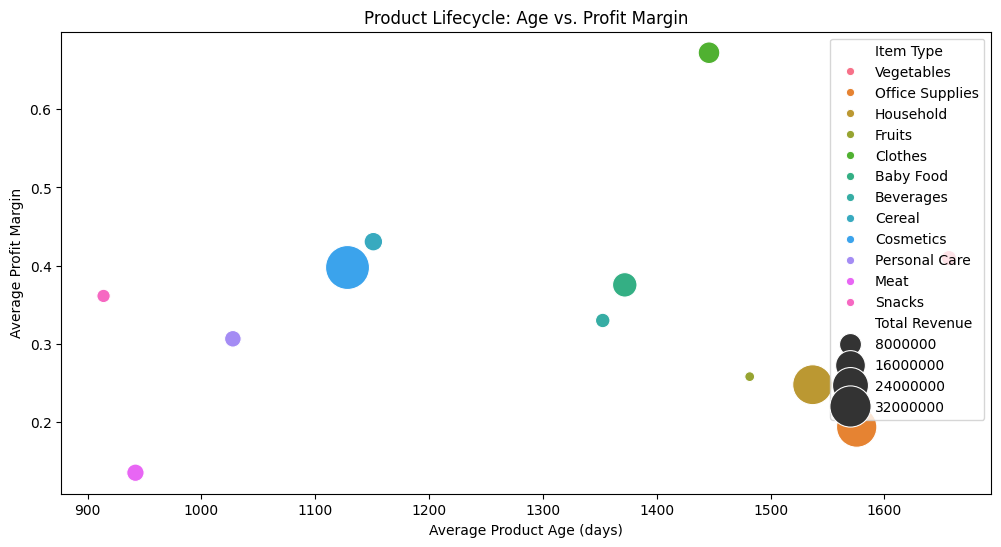

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Product Age'] = (df['Order Date'].max() - df['Order Date']).dt.days

lifecycle_analysis = df.groupby('Item Type').agg({
    'Product Age': 'mean',
    'Units Sold': 'sum',
    'Total Revenue': 'sum',
    'Profit Margin': 'mean'
}).sort_values('Product Age', ascending=False)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=lifecycle_analysis, x='Product Age', y='Profit Margin',
                size='Total Revenue', hue='Item Type', sizes=(50, 1000))
plt.title('Product Lifecycle: Age vs. Profit Margin')
plt.xlabel('Average Product Age (days)')
plt.ylabel('Average Profit Margin')
plt.show()

Conclusion: This analysis reveals how product profitability evolves over time. We can identify product categories like clothes,fruits,households,office supplies and vegetables have longevity and which may need refreshing or marketing boosts as they age.

# 11. Top 10 product category Pairs

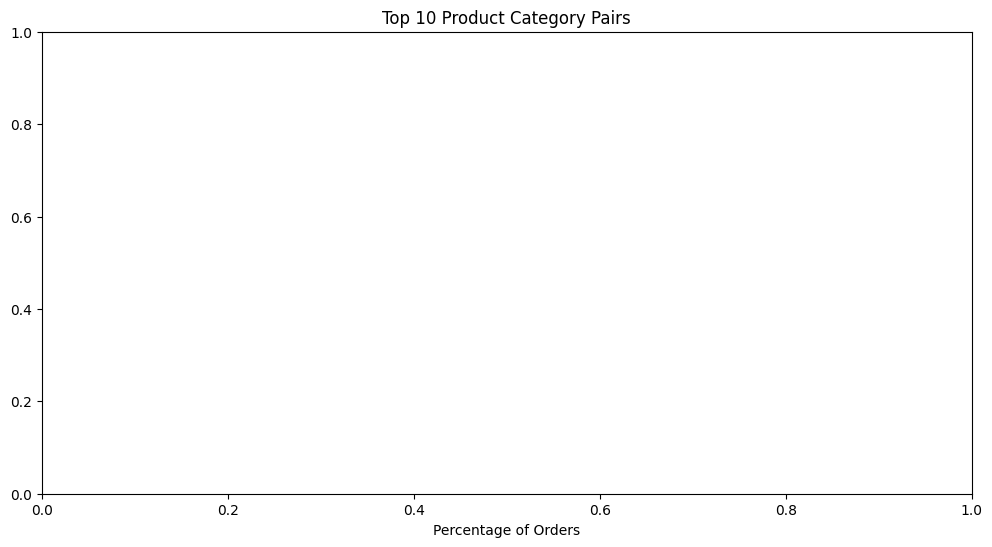

In [ ]:
from itertools import combinations
from collections import Counter

def get_item_pairs(x):
    return list(combinations(sorted(x), 2))

item_pairs = df.groupby('Order ID')['Item Type'].agg(get_item_pairs)
pair_counts = Counter([pair for pairs in item_pairs for pair in pairs])

top_pairs = pd.DataFrame(pair_counts.most_common(10), columns=['Pair', 'Count'])
top_pairs['Percentage'] = top_pairs['Count'] / len(df['Order ID'].unique()) * 100

plt.figure(figsize=(12, 6))
sns.barplot(x='Percentage', y='Pair', data=top_pairs)
plt.title('Top 10 Product Category Pairs')
plt.xlabel('Percentage of Orders')
plt.show()

Conclusion:This chart suggest that there aren't any item pairs occurring frequently enough in the dataset

#12.Order Priority Analysis
A bar chart showing revenue by order priority.

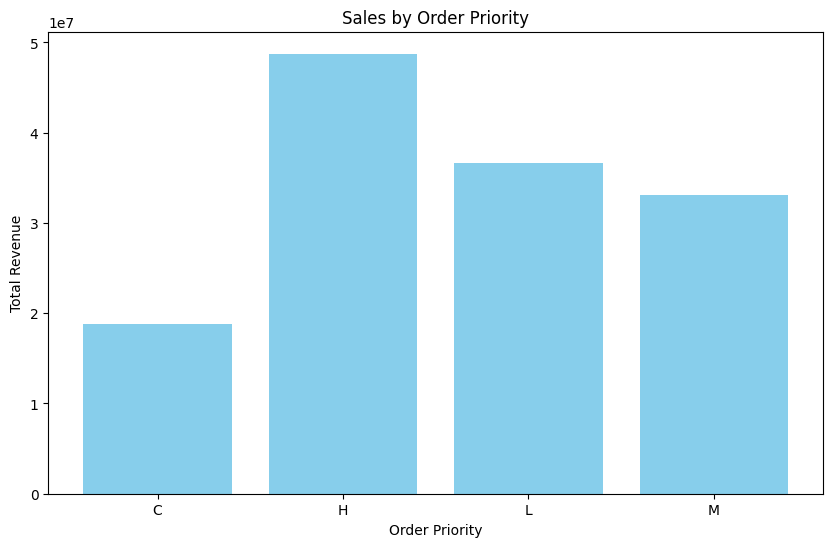

In [ ]:

priority_sales = df.groupby('Order Priority')['Total Revenue'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(priority_sales['Order Priority'], priority_sales['Total Revenue'], color='skyblue')
plt.title('Sales by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Total Revenue')
plt.show()


#1. let's prepare our data for time series forecasting:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

#2. Next, let's create a model to predict the sales channel

In [ ]:
# Prepare the data
X = df[['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']]
y = df['Sales Channel']

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_classifier.predict(X_test_scaled)

In [ ]:
# Print the classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

     Offline       0.58      0.64      0.61        11
      Online       0.50      0.44      0.47         9

    accuracy                           0.55        20
   macro avg       0.54      0.54      0.54        20
weighted avg       0.55      0.55      0.55        20


Confusion Matrix:
[[7 4]
 [5 4]]


In [ ]:
# Feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_classifier.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
         feature  importance
4     Total Cost    0.223762
3  Total Revenue    0.208550
5   Total Profit    0.197672
0     Units Sold    0.189729
1     Unit Price    0.119200
2      Unit Cost    0.061087


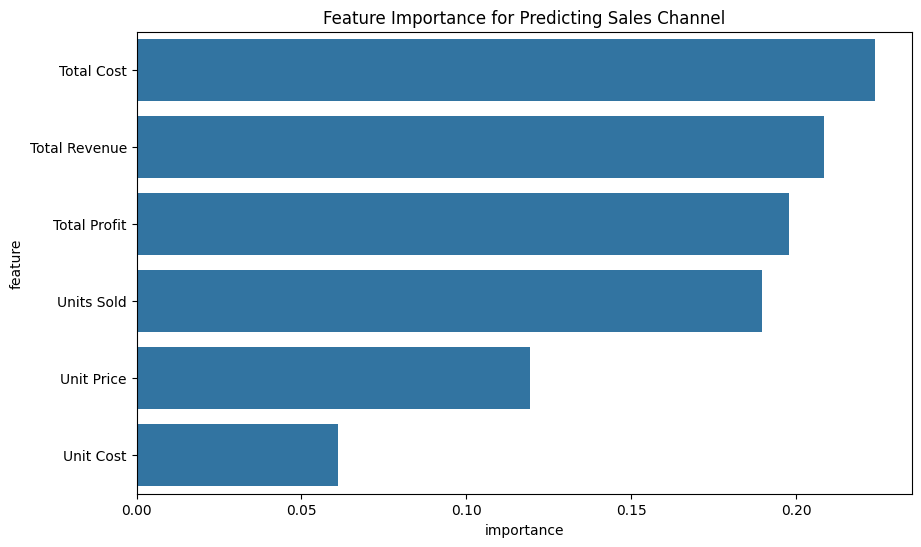

In [ ]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance for Predicting Sales Channel')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'n_estimators': [100, 200, 500],
          'max_depth': [None, 10, 20, 30],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4]}


In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(), params, cv=5)


In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]})

In [ ]:
grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

In [ ]:
grid_predictions=grid_search.predict(X_test)

# Evaluate the performance of the model with the best hyperparameters

In [ ]:
confusion_matrix(y_test, grid_predictions)

array([[8, 3],
       [5, 4]])

In [ ]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

     Offline       0.62      0.73      0.67        11
      Online       0.57      0.44      0.50         9

    accuracy                           0.60        20
   macro avg       0.59      0.59      0.58        20
weighted avg       0.60      0.60      0.59        20

